# Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_ind
from sklearn import metrics
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
# from datasist.structdata import detect_outliers

import plotly.express as px

# Importing data

In [2]:
train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

# Preview of data

In [3]:
train_data

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                          

In [4]:
test_data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1

In [5]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
len(train_data.columns)

23

In [7]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
len(test_data.columns)

23

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
train_data.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

### check if there is any null value

In [11]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Feature Engineering

### Time Features

In [13]:
train_data.trans_date_trans_time

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1296670    2020-06-21 12:12:08
1296671    2020-06-21 12:12:19
1296672    2020-06-21 12:12:32
1296673    2020-06-21 12:13:36
1296674    2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: object

In [14]:
test_data.trans_date_trans_time

0         2020-06-21 12:14:25
1         2020-06-21 12:14:33
2         2020-06-21 12:14:53
3         2020-06-21 12:15:15
4         2020-06-21 12:15:17
                 ...         
555714    2020-12-31 23:59:07
555715    2020-12-31 23:59:09
555716    2020-12-31 23:59:15
555717    2020-12-31 23:59:24
555718    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 555719, dtype: object

In [15]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

In [16]:
train_data['hour'] = train_data.trans_date_trans_time.dt.hour
test_data['hour'] = test_data.trans_date_trans_time.dt.hour
train_data['week_day'] = train_data.trans_date_trans_time.dt.dayofweek
test_data['week_day'] = test_data.trans_date_trans_time.dt.dayofweek

In [17]:
train_data.hour

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: hour, Length: 1296675, dtype: int32

In [18]:
train_data.week_day

0          1
1          1
2          1
3          1
4          1
          ..
1296670    6
1296671    6
1296672    6
1296673    6
1296674    6
Name: week_day, Length: 1296675, dtype: int32

In [19]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'week_day'],
      dtype='object')

In [20]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

train_data.sort_values(by='trans_date_trans_time', inplace=True)

train_data['transactions_last_1d'] = train_data['trans_date_trans_time'].rolling(window=1).count()
train_data['transactions_last_7d'] = train_data['trans_date_trans_time'].rolling(window=7).count()
train_data['transactions_last_30d'] = train_data['trans_date_trans_time'].rolling(window=30).count()

train_data['transactions_last_1d'].fillna(0, inplace=True)
train_data['transactions_last_7d'].fillna(0, inplace=True)
train_data['transactions_last_30d'].fillna(0, inplace=True)

In [21]:
train_data['transactions_last_1d']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1296670    1.0
1296671    1.0
1296672    1.0
1296673    1.0
1296674    1.0
Name: transactions_last_1d, Length: 1296675, dtype: float64

In [22]:
train_data['transactions_last_7d'] 

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1296670    7.0
1296671    7.0
1296672    7.0
1296673    7.0
1296674    7.0
Name: transactions_last_7d, Length: 1296675, dtype: float64

In [23]:
train_data['transactions_last_30d']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
1296670    30.0
1296671    30.0
1296672    30.0
1296673    30.0
1296674    30.0
Name: transactions_last_30d, Length: 1296675, dtype: float64

In [24]:
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

test_data.sort_values(by='trans_date_trans_time', inplace=True)

test_data['transactions_last_1d'] = test_data['trans_date_trans_time'].rolling(window=1).count()
test_data['transactions_last_7d'] = test_data['trans_date_trans_time'].rolling(window=7).count()
test_data['transactions_last_30d'] = test_data['trans_date_trans_time'].rolling(window=30).count()

test_data['transactions_last_1d'].fillna(0, inplace=True)
test_data['transactions_last_7d'].fillna(0, inplace=True)
test_data['transactions_last_30d'].fillna(0, inplace=True)

In [25]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'week_day',
       'transactions_last_1d', 'transactions_last_7d',
       'transactions_last_30d'],
      dtype='object')

In [26]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'week_day',
       'transactions_last_1d', 'transactions_last_7d',
       'transactions_last_30d'],
      dtype='object')

# Data imbalance check

In [27]:
fraud_counts = train_data['is_fraud'].value_counts()
print(fraud_counts)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


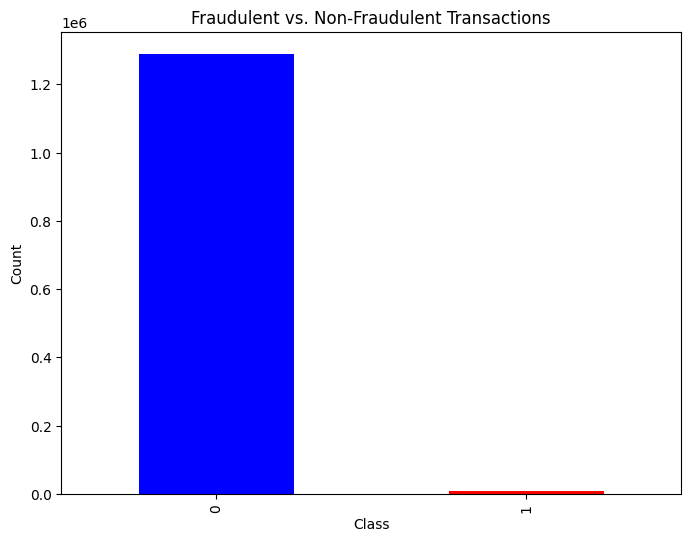

In [28]:
plt.figure(figsize=(8, 6))
train_data['is_fraud'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [29]:
fraud_percentage = train_data['is_fraud'].value_counts(normalize=True) * 100
print(fraud_percentage)

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


In [30]:
imbalance_ratio = fraud_counts[0] / fraud_counts[1]
print(f"Imbalance Ratio: {imbalance_ratio}")

Imbalance Ratio: 171.75179856115108


# Exploratory data analysis

In [31]:
numeric_columns = train_data.select_dtypes(include=['number']).columns


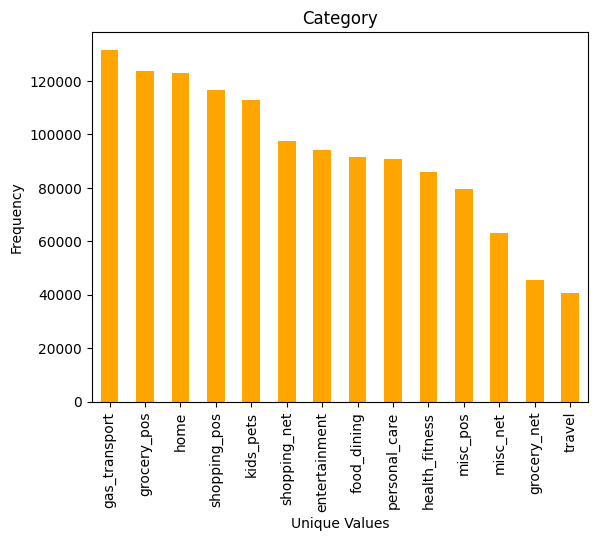

In [32]:
value_counts = train_data['category'].value_counts()
value_counts.plot(kind='bar', color='orange')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Category')
plt.show()

In [33]:
category_fraud_counts = train_data.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)
print(category_fraud_counts)

is_fraud             0     1
category                    
entertainment    93781   233
food_dining      91310   151
gas_transport   131041   618
grocery_net      45318   134
grocery_pos     121895  1743
health_fitness   85746   133
home            122917   198
kids_pets       112796   239
misc_net         62372   915
misc_pos         79405   250
personal_care    90538   220
shopping_net     95830  1713
shopping_pos    115829   843
travel           40391   116


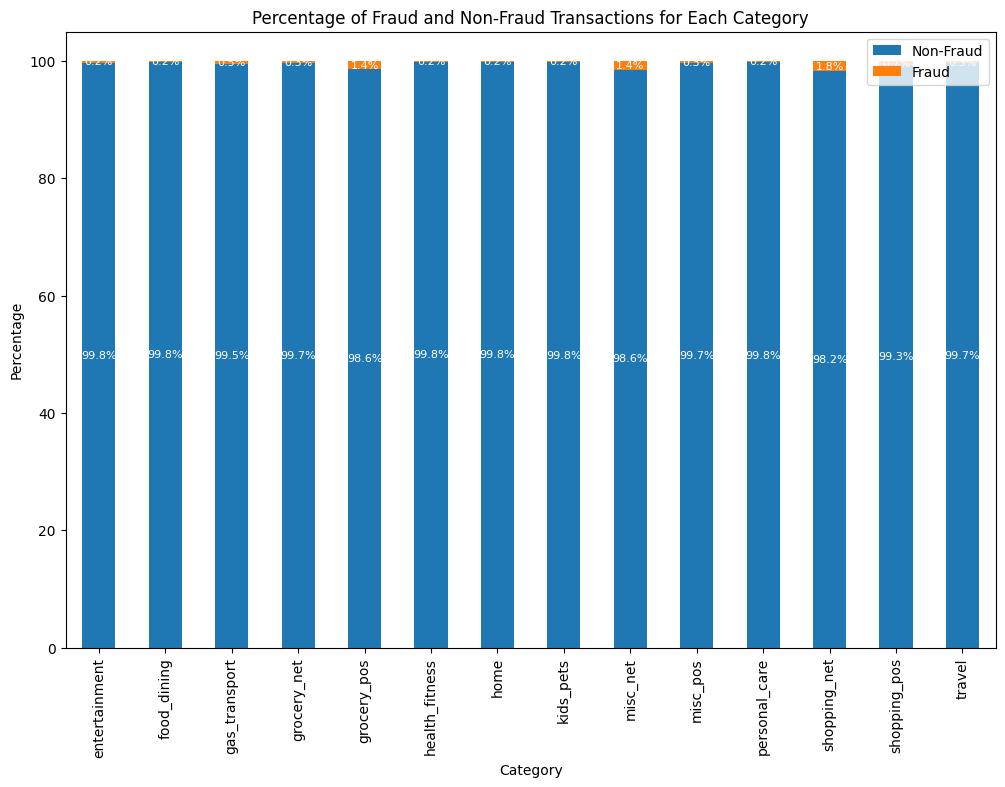

In [34]:
category_fraud_percentage = category_fraud_counts.div(category_fraud_counts.sum(axis=1), axis=0) * 100

category_fraud_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Percentage of Fraud and Non-Fraud Transactions for Each Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(['Non-Fraud', 'Fraud'], loc='upper right')

for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    plt.text(p.get_x() + width / 2, p.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=8, color='white')

plt.show()

In [35]:
print(train_data['gender'].value_counts())

gender
F    709863
M    586812
Name: count, dtype: int64


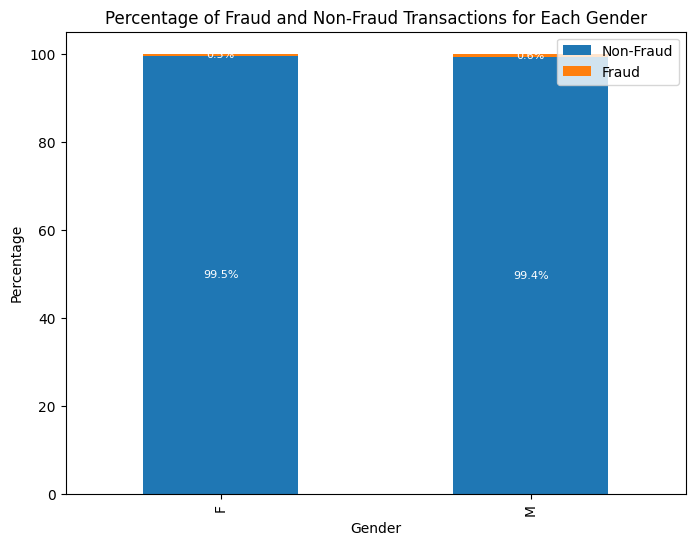

In [36]:
gender_fraud_counts = pd.crosstab(train_data['gender'], train_data['is_fraud'])

# Calculate the percentage of fraud and non-fraud transactions for each gender
gender_fraud_percentage = gender_fraud_counts.div(gender_fraud_counts.sum(axis=1), axis=0) * 100

# Plot the percentage for each gender
gender_fraud_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Percentage of Fraud and Non-Fraud Transactions for Each Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(['Non-Fraud', 'Fraud'], loc='upper right')

# Display percentage values on each segment of the bar
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    plt.text(p.get_x() + width / 2, p.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=8, color='white')

plt.show()

In [37]:
gender_fraud_percentage

is_fraud          0         1
gender                       
F         99.473842  0.526158
M         99.357375  0.642625

### sine and cosine transformations on transaction date and time 

In [38]:
train_data['trans_datetime'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['DayOfWeek'] = train_data['trans_datetime'].dt.dayofweek # 0 to 6

test_data['trans_datetime'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['DayOfWeek'] = test_data['trans_datetime'].dt.dayofweek # 0 to 6

In [39]:
train_data['DayOfWeekSin'] = np.sin(2 * np.pi * train_data['DayOfWeek'] / 7)
train_data['DayOfWeekCos'] = np.cos(2 * np.pi * train_data['DayOfWeek'] / 7)

test_data['DayOfWeekSin'] = np.sin(2 * np.pi * test_data['DayOfWeek'] / 7)
test_data['DayOfWeekCos'] = np.cos(2 * np.pi * test_data['DayOfWeek'] / 7)

In [40]:
train_data['DayOfWeekCos']

0          0.62349
1          0.62349
2          0.62349
3          0.62349
4          0.62349
            ...   
1296670    0.62349
1296671    0.62349
1296672    0.62349
1296673    0.62349
1296674    0.62349
Name: DayOfWeekCos, Length: 1296675, dtype: float64

In [41]:
train_data['DayOfWeekSin']

0          0.781831
1          0.781831
2          0.781831
3          0.781831
4          0.781831
             ...   
1296670   -0.781831
1296671   -0.781831
1296672   -0.781831
1296673   -0.781831
1296674   -0.781831
Name: DayOfWeekSin, Length: 1296675, dtype: float64

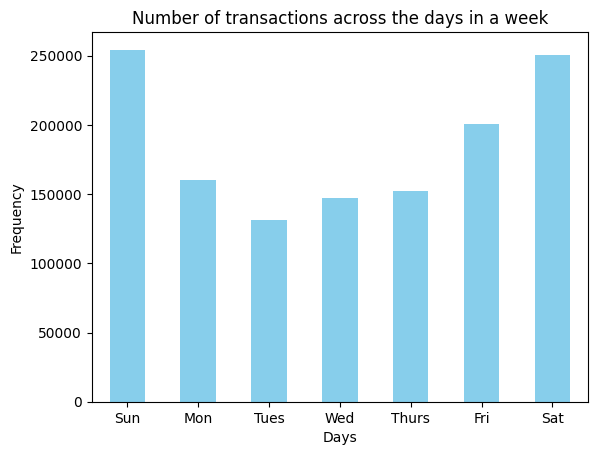

In [42]:
value_counts = train_data['DayOfWeek'].value_counts().sort_index()
value_counts.plot(kind='bar', color='skyblue')
plt.title('Number of transactions across the days in a week')
plt.ylabel('Frequency')
plt.xlabel('Days')

plt.xticks(value_counts.index, ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'], rotation=0)  

plt.show()

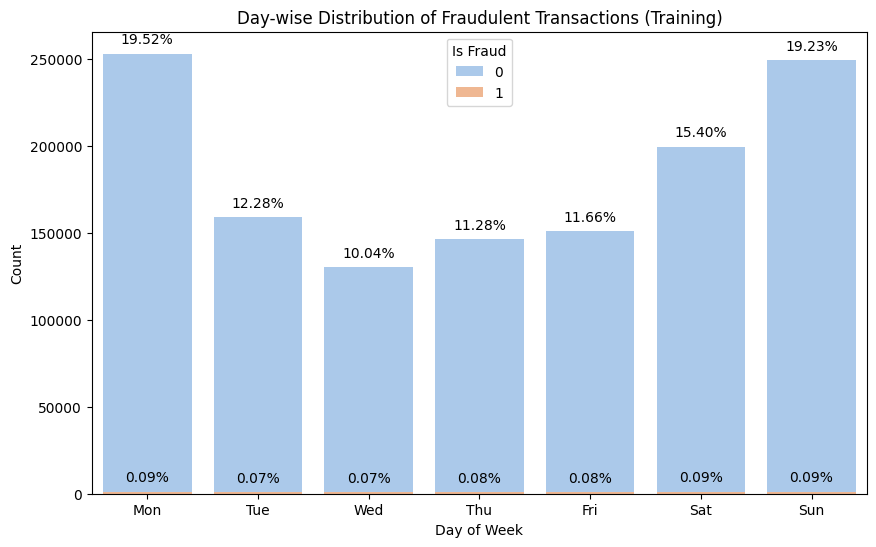

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='week_day', hue='is_fraud', data=train_data, dodge=False, palette='pastel')

total_height = len(train_data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total_height) * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Day-wise Distribution of Fraudulent Transactions (Training)')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()

In [44]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = np.ceil((train_data['trans_datetime'] - train_data['dob']).dt.days / 365).astype(int)

test_data['dob'] = pd.to_datetime(test_data['dob'])
test_data['age'] = np.ceil((test_data['trans_datetime'] - test_data['dob']).dt.days / 365).astype(int)

In [45]:
print(train_data[['dob', 'trans_datetime', 'age']].head())


         dob      trans_datetime  age
0 1988-03-09 2019-01-01 00:00:18   31
1 1978-06-21 2019-01-01 00:00:44   41
2 1962-01-19 2019-01-01 00:00:51   57
3 1967-01-12 2019-01-01 00:01:16   53
4 1986-03-28 2019-01-01 00:03:06   33


In [46]:
not_fraud = train_data[train_data['is_fraud'] == 0]
fraud = train_data[train_data['is_fraud'] == 1]

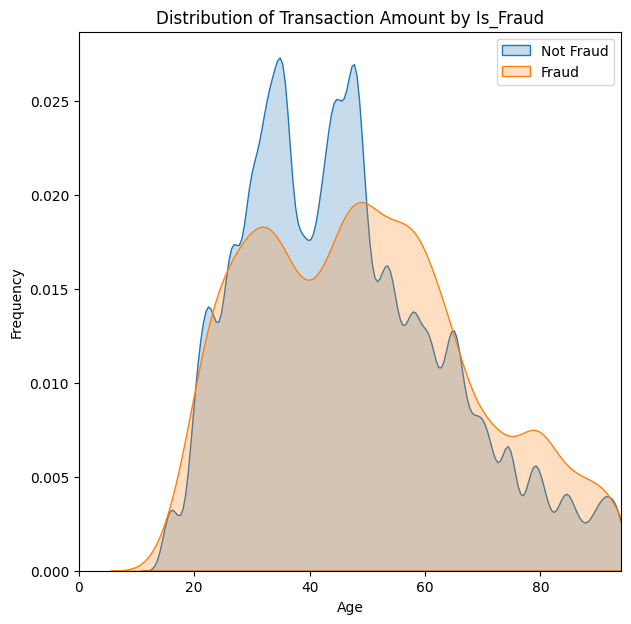

In [47]:
plt.figure(figsize=(7,7))
sns.kdeplot(not_fraud.age, fill=True, label='Not Fraud')
sns.kdeplot(fraud.age, fill=True, label='Fraud')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.xlim(0, fraud.age.max())
plt.title('Distribution of Transaction Amount by Is_Fraud')
plt.legend()

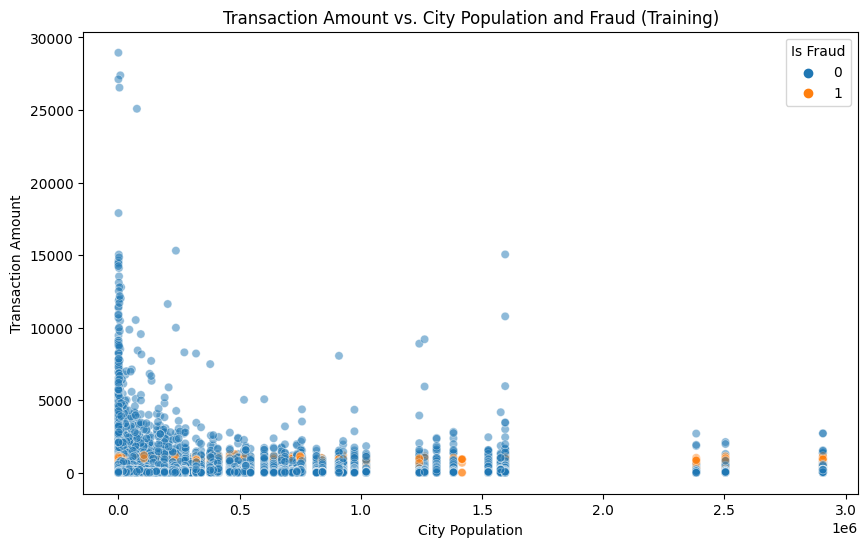

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud',alpha=0.5, data=train_data)
plt.title('Transaction Amount vs. City Population and Fraud (Training)')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()

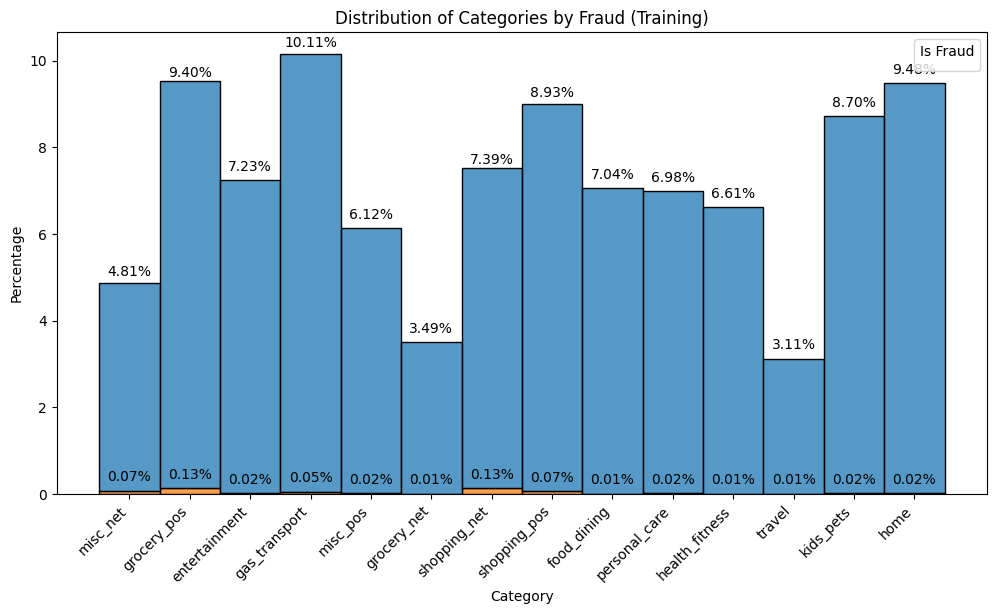

In [49]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=train_data, x='category', hue='is_fraud', multiple='stack', stat='percent')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of Categories by Fraud (Training)')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

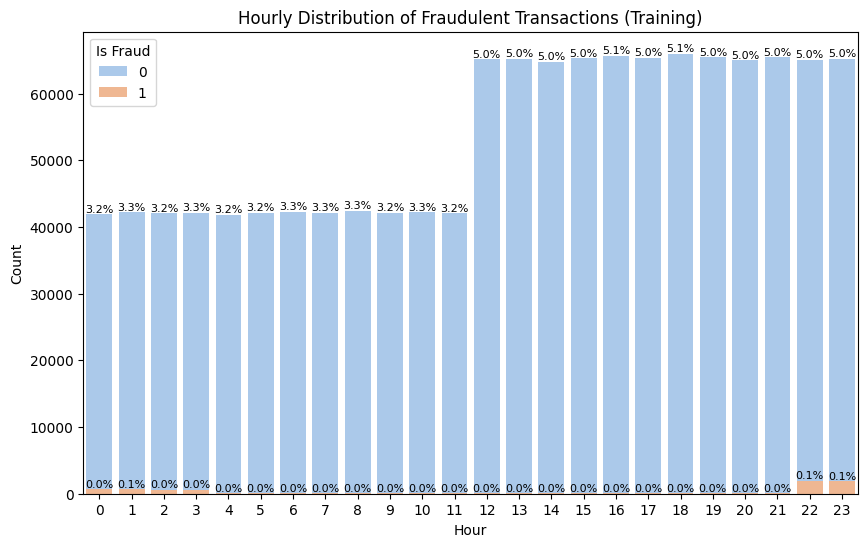

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_data, x="hour", hue="is_fraud", dodge = False, palette='pastel')
plt.title('Hourly Distribution of Fraudulent Transactions (Training)')
plt.xlabel('Hour')
plt.ylabel('Count')
total = len(train_data['is_fraud'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=8, color='black')
plt.legend(title='Is Fraud')
plt.show()

In [51]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'week_day',
       'transactions_last_1d', 'transactions_last_7d', 'transactions_last_30d',
       'trans_datetime', 'DayOfWeek', 'DayOfWeekSin', 'DayOfWeekCos', 'age'],
      dtype='object')

In [52]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'week_day',
       'transactions_last_1d', 'transactions_last_7d', 'transactions_last_30d',
       'trans_datetime', 'DayOfWeek', 'DayOfWeekSin', 'DayOfWeekCos', 'age'],
      dtype='object')

In [53]:
numeric_columns

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'week_day',
       'transactions_last_1d', 'transactions_last_7d',
       'transactions_last_30d'],
      dtype='object')

<Axes: xlabel='merch_long', ylabel='merch_lat'>

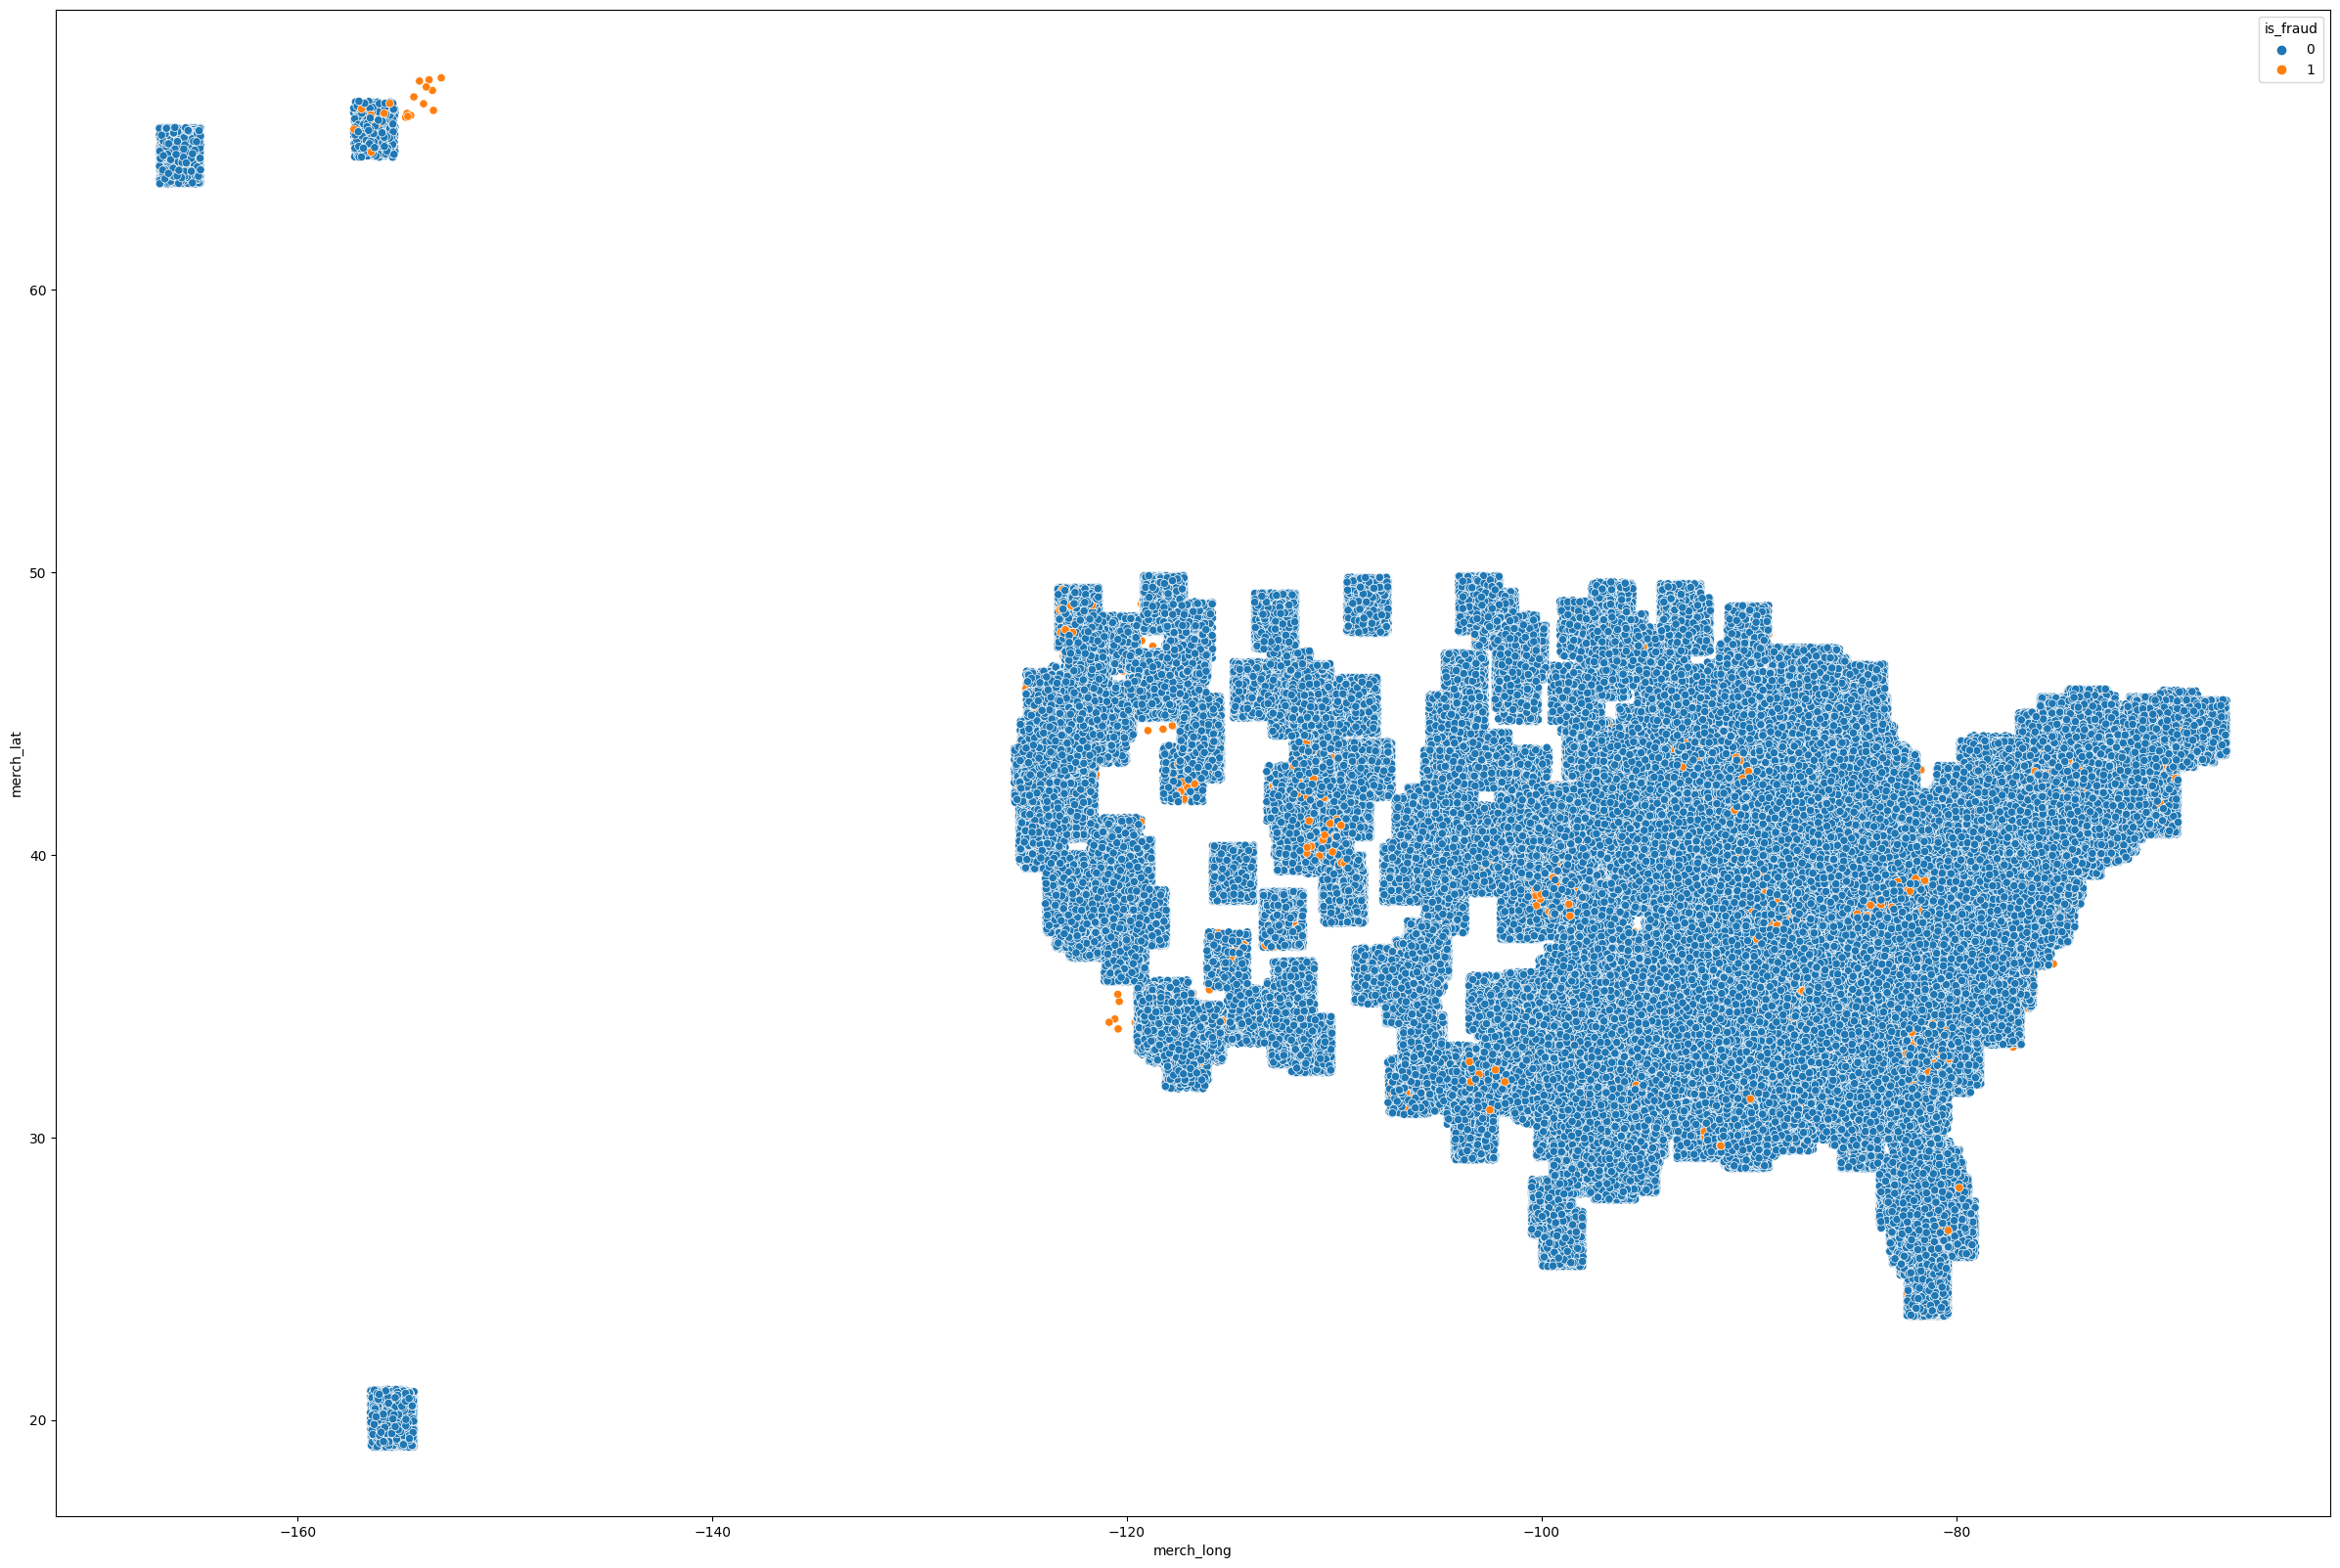

In [54]:
fig = plt.figure(figsize=(30,20))
sns.scatterplot(x=train_data['merch_long'],y=train_data['merch_lat'],data=train_data,hue=train_data['is_fraud'])

### Transaction Frequency Analysis

<Figure size 1000x600 with 0 Axes>

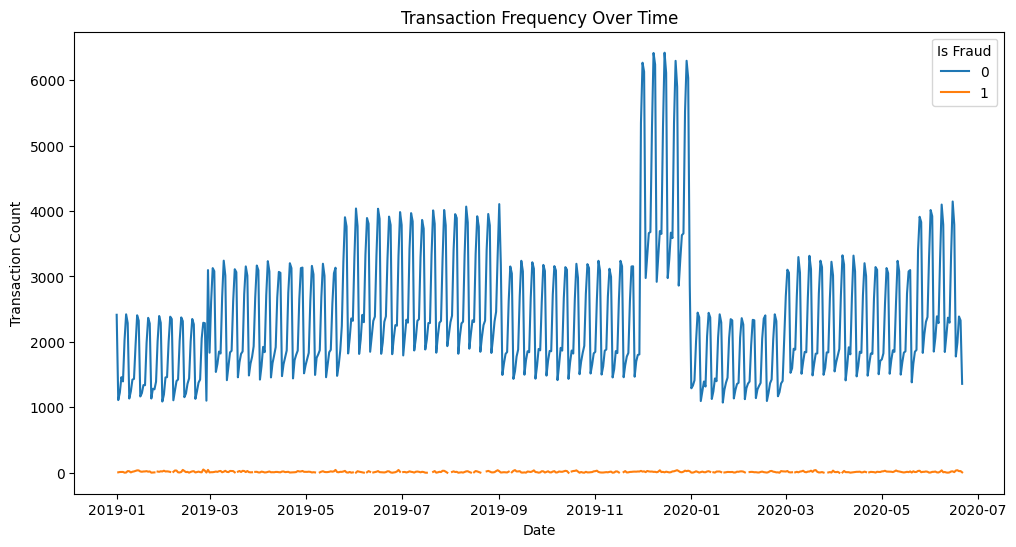

In [55]:
plt.figure(figsize=(10, 6))
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date'] = train_data['trans_date_trans_time'].dt.date
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_date'] = test_data['trans_date_trans_time'].dt.date
transaction_counts = train_data.groupby(['trans_date', 'is_fraud']).size().unstack()
transaction_counts.plot(kind='line', figsize=(12, 6))
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud')
plt.show()

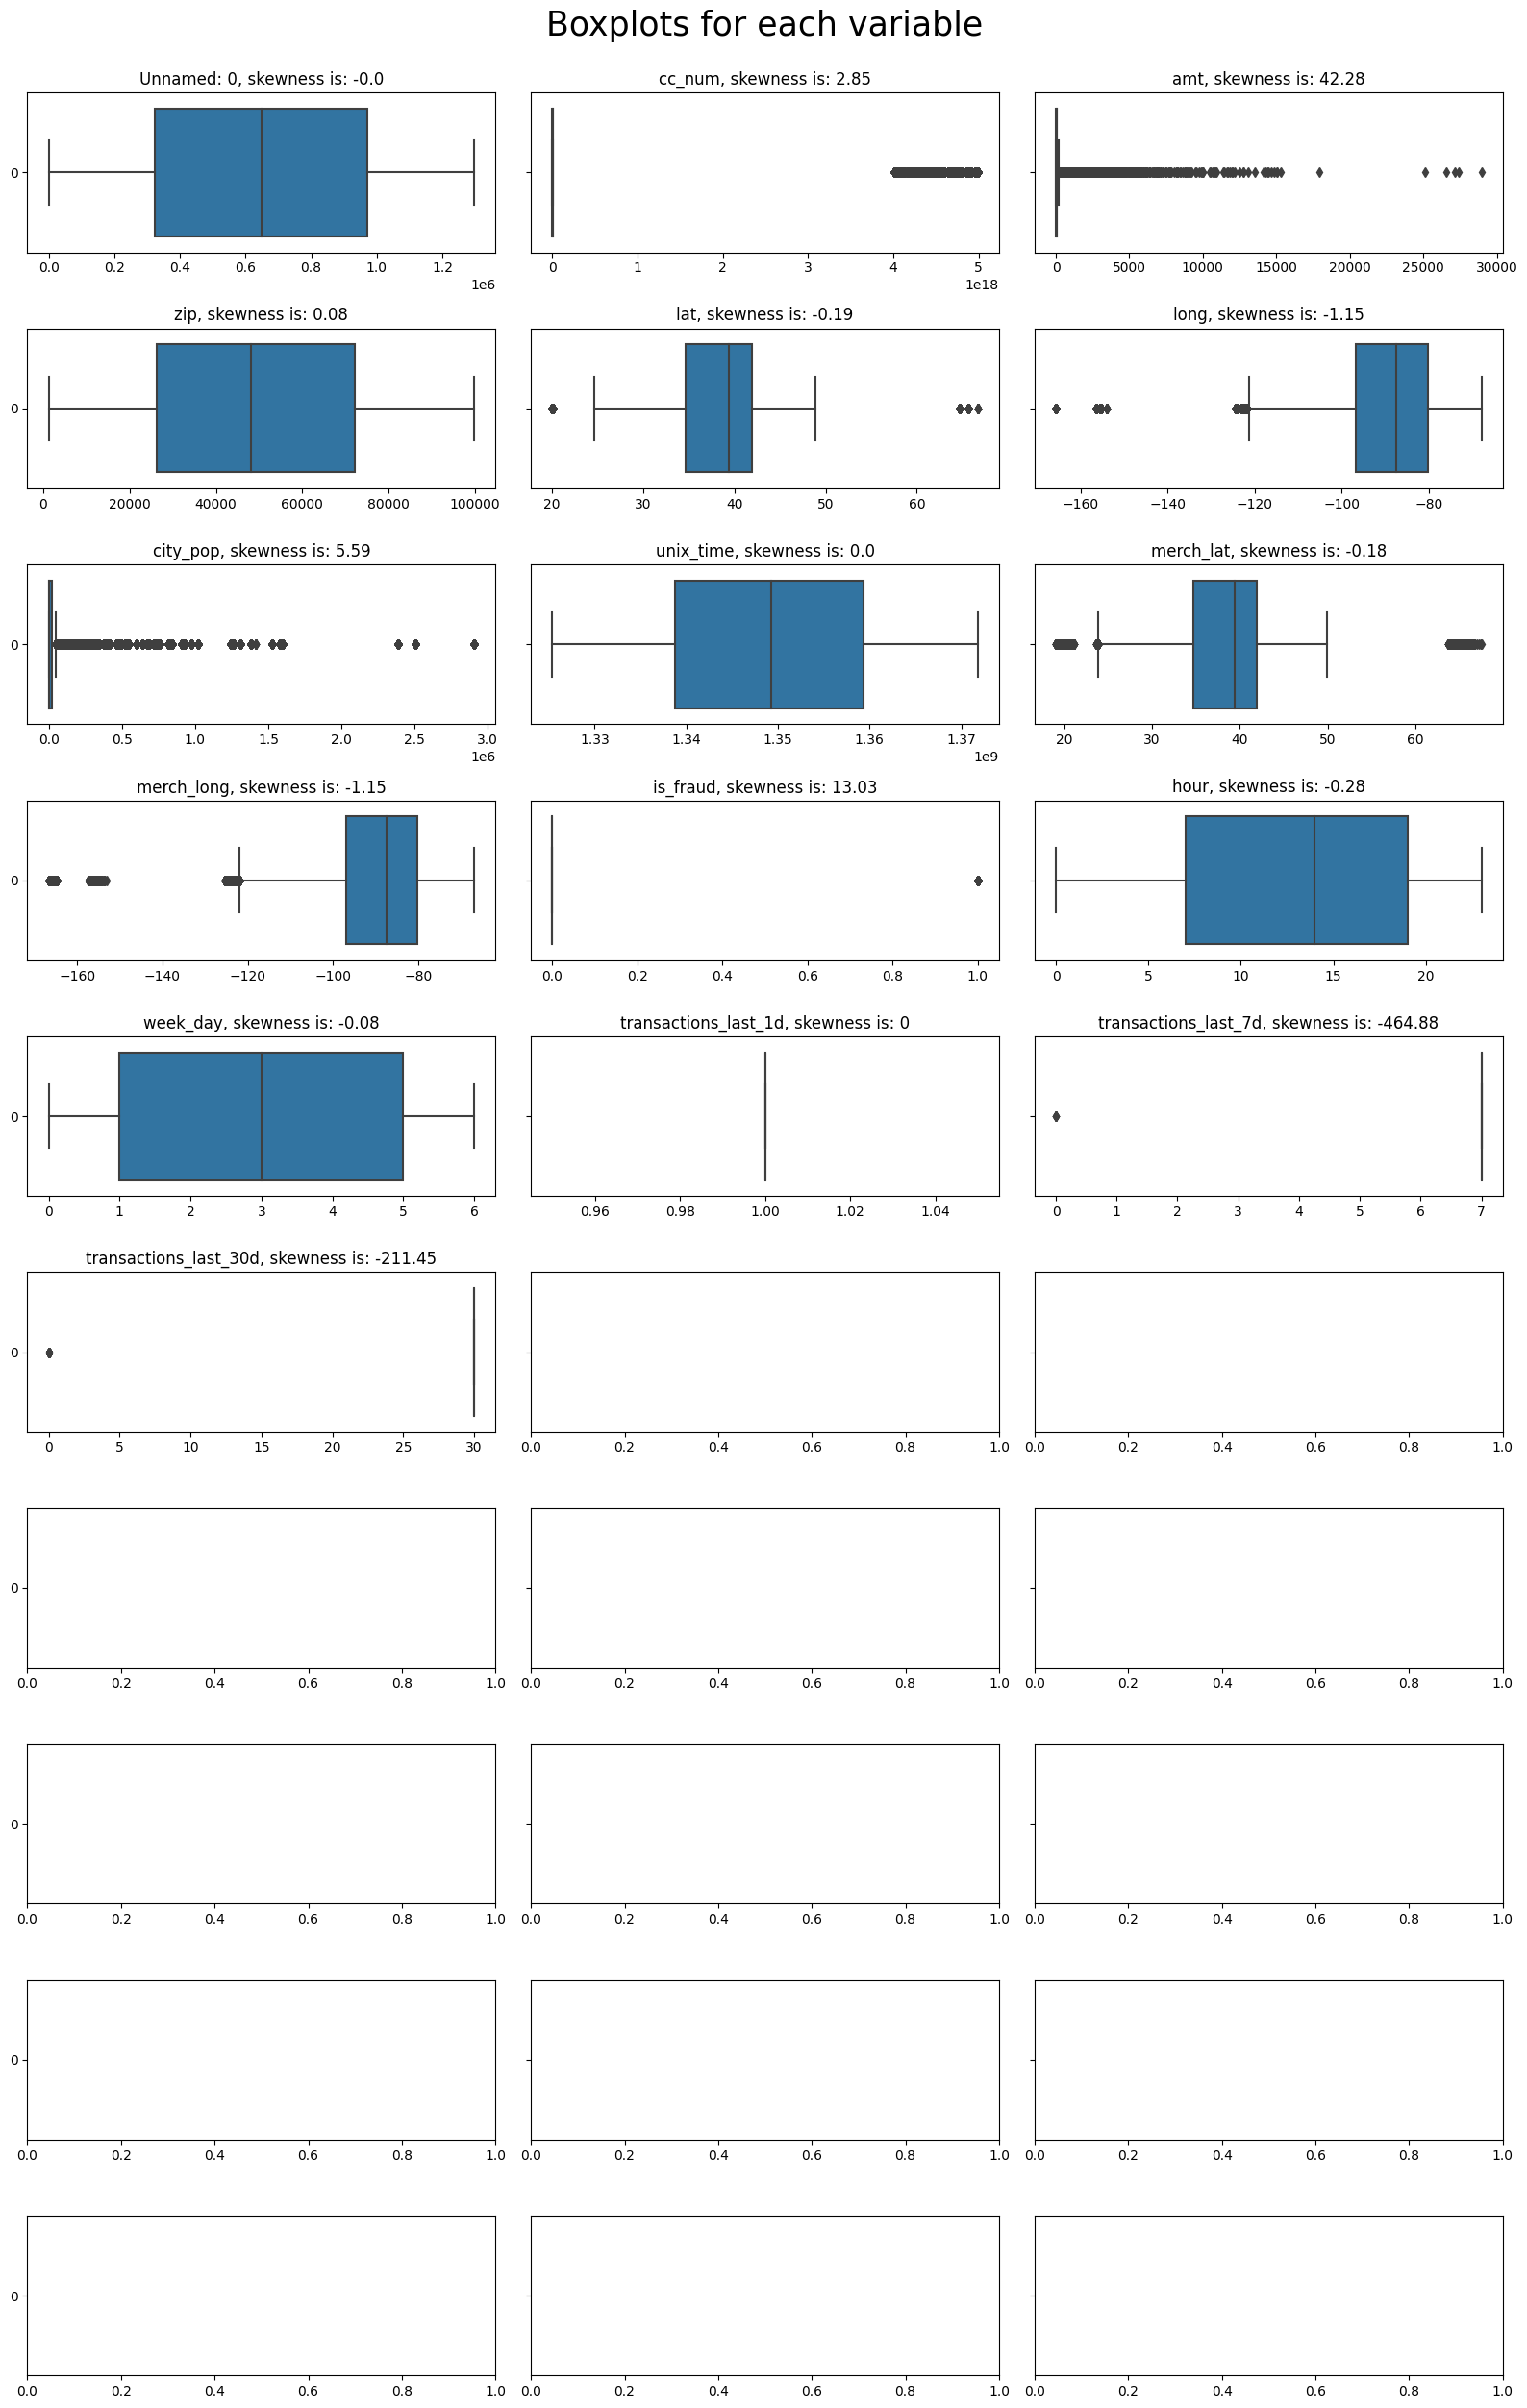

In [56]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=train_data, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [57]:
def bar_plot(col):
    def top_frauds(col):
        return pd.DataFrame(train_data.loc[train_data['is_fraud']==1,[col]].value_counts()).reset_index().head(10)
    ax=sns.barplot(data=top_frauds(col),x=col,y='count',palette='bone')
    ax.bar_label(ax.containers[0])
    plt.title(f'Top 10 Frauds | {col}',fontsize=16,fontweight='bold')
    plt.xticks(rotation=45,fontweight='bold')

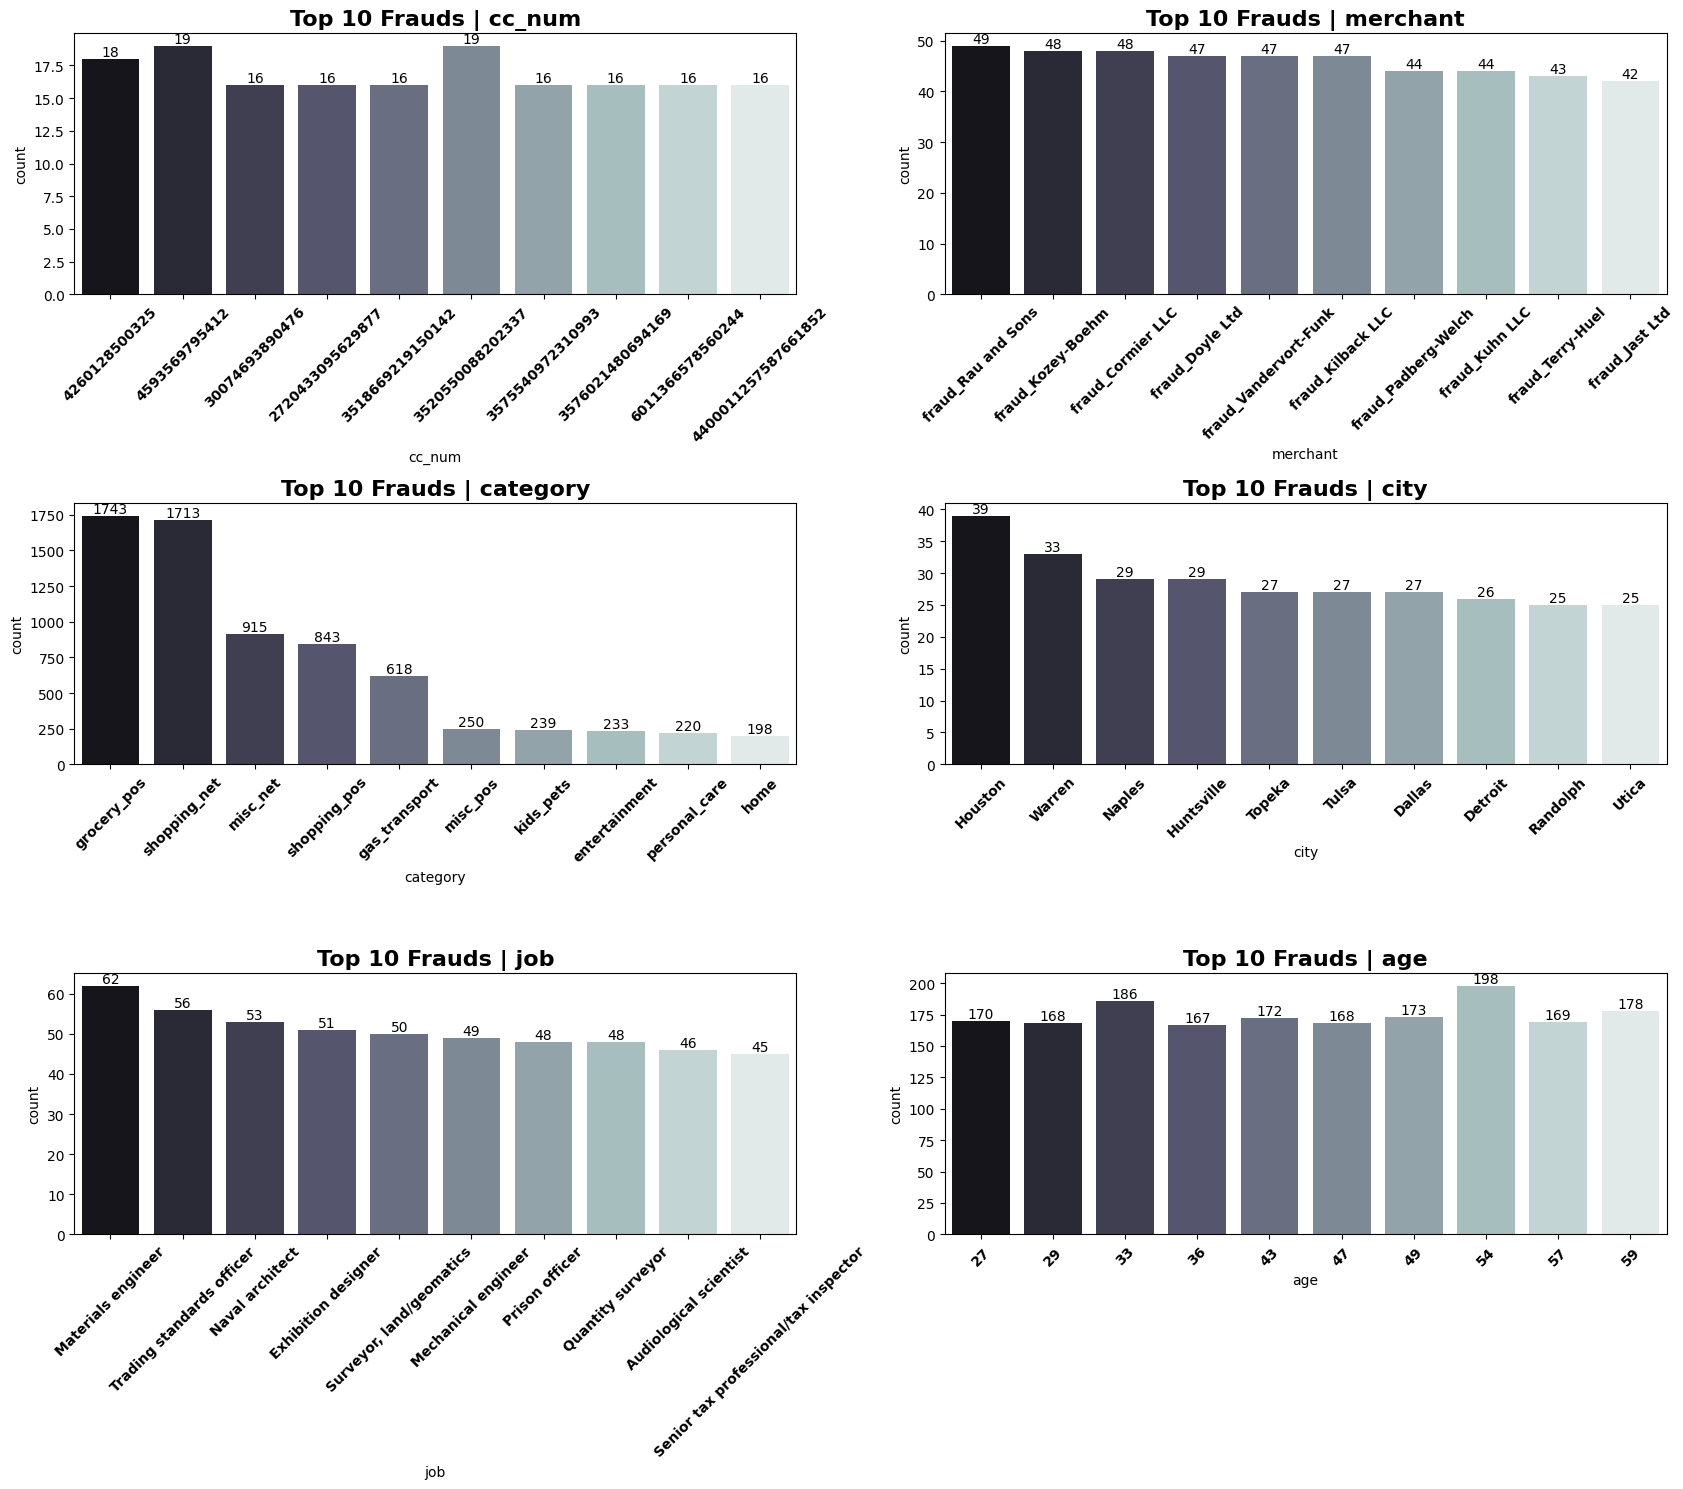

In [58]:
plt.figure(figsize=(17,15))
for idx,val in enumerate(['cc_num','merchant','category','city','job','age']):
    plt.subplot(3,2,idx+1)
    bar_plot(val)
plt.tight_layout()

### What is the most month|day|hour frauds occur?

In [59]:
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['day'] = train_data['trans_date_trans_time'].dt.day_name()
train_data['month'] = train_data['trans_date_trans_time'].dt.month

test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['day'] = test_data['trans_date_trans_time'].dt.day_name()
test_data['month'] = test_data['trans_date_trans_time'].dt.month

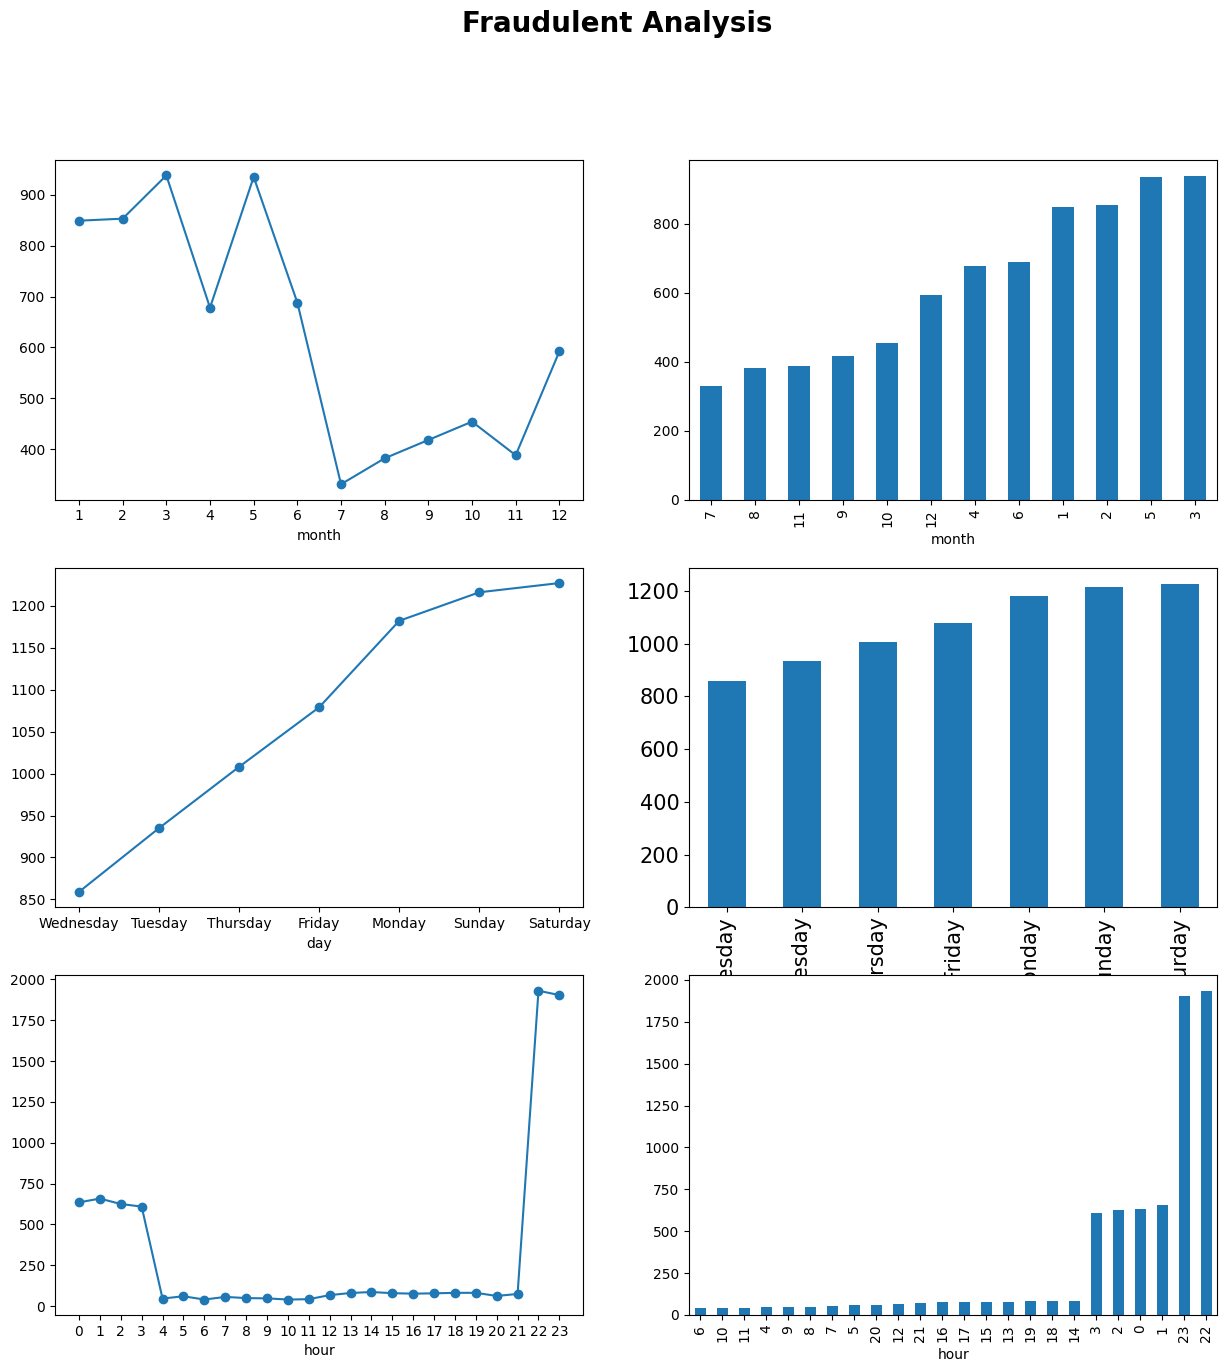

In [60]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns of subplots

# Month
train_data.loc[train_data['is_fraud'] == 1, 'month'].value_counts().sort_index().plot(kind='line', ax=axs[0, 0], marker='o')
axs[0, 0].set_xticks(range(1, 13))  # Assuming months are from 1 to 12
train_data.loc[train_data['is_fraud'] == 1, 'month'].value_counts(ascending=True).plot(kind='bar', ax=axs[0, 1])

# Day
train_data.loc[train_data['is_fraud'] == 1, 'day'].value_counts(ascending=True).plot(kind='line', ax=axs[1, 0], marker='o')
train_data.loc[train_data['is_fraud'] == 1, 'day'].value_counts(ascending=True).plot(kind='bar', ax=axs[1, 1], fontsize=15)

# Hour
train_data.loc[train_data['is_fraud'] == 1, 'hour'].value_counts().sort_index().plot(kind='line', ax=axs[2, 0], marker='o')
axs[2, 0].set_xticks(range(0, 24))
train_data.loc[train_data['is_fraud'] == 1, 'hour'].value_counts(ascending=True).plot(kind='bar', ax=axs[2, 1])

# Title for the entire figure
fig.suptitle('Fraudulent Analysis', fontsize=20, fontweight='bold')

plt.show()

We conclude that most fraud transactions occurs:
On March
On Sunday
At 10 PM

### Males and females exposed to fraud equally (approximately)

In [61]:
train_data.loc[train_data['is_fraud']==1,['gender']].value_counts()

gender
M         3771
F         3735
Name: count, dtype: int64

In [62]:
males_fraud = train_data[(train_data['is_fraud'] == 1) & (train_data['gender'] == 'M')]['amt']
females_fraud = train_data[(train_data['is_fraud'] == 1) & (train_data['gender'] == 'F')]['amt']

# Perform t-test
t_stat, p_value = ttest_ind(males_fraud, females_fraud)

# Output the results
print(f'T-test: t-statistic = {round(t_stat, 3)}, p-value = {round(p_value, 3)}, p-value<0.05? {p_value < 0.05}')

T-test: t-statistic = 8.264, p-value = 0.0, p-value<0.05? True


In [63]:
fraud_population = train_data[train_data['is_fraud'] == 1]['city_pop']
non_fraud_population = train_data[train_data['is_fraud'] == 0]['city_pop']
t_stat, p_value = ttest_ind(fraud_population, non_fraud_population)
print(f'T-test: t-statistic = {round(t_stat,3)}, p-value = {round(p_value,3)}, p-value<0.05? {p_value<0.05}')

T-test: t-statistic = 2.432, p-value = 0.015, p-value<0.05? True


Since we accept the null hypothesis,we conclude that there is no significant difference between means,
We conclude also that city_population does not help us on the target(is_fraud), so we will drop it

### Handling and extracting features from cc_num


In [64]:
# freq = train_data.groupby('cc_num').size()
# train_data['cc_freq'] = train_data['cc_num'].apply(lambda x : freq[x])
# train_data[['cc_num','cc_freq']].head()

# test_data['cc_freq'] = test_data['cc_num'].apply(lambda x : freq[x])
# test_data[['cc_num','cc_freq']].head()

freq = train_data['cc_num'].value_counts()

# Create 'cc_freq' feature for both train_data and test_data
train_data['cc_freq'] = train_data['cc_num'].apply(lambda x: freq.get(x, 0))
test_data['cc_freq'] = test_data['cc_num'].apply(lambda x: freq.get(x, 0))

# Display the head of the DataFrame to verify the changes
print(train_data[['cc_num', 'cc_freq']].head())
print(test_data[['cc_num', 'cc_freq']].head())


             cc_num  cc_freq
0  2703186189652095     2028
1      630423337322     3030
2    38859492057661      503
3  3534093764340240      493
4   375534208663984     2017
             cc_num  cc_freq
0  2291163933867244     1561
1  3573030041201292     2089
2  3598215285024754     2577
3  3591919803438423     1526
4  3526826139003047     2034


In [65]:
def hist_show(col):
    fig,axs = plt.subplots(1,2,sharex=True)
    for i in [0,1]:
        sns.histplot(train_data[train_data["is_fraud"]==i][col], bins=6,ax=axs[i])

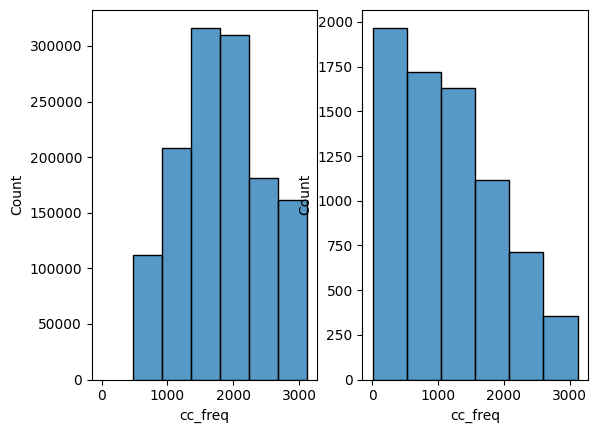

In [66]:
hist_show('cc_freq')

[3 4 1 2]


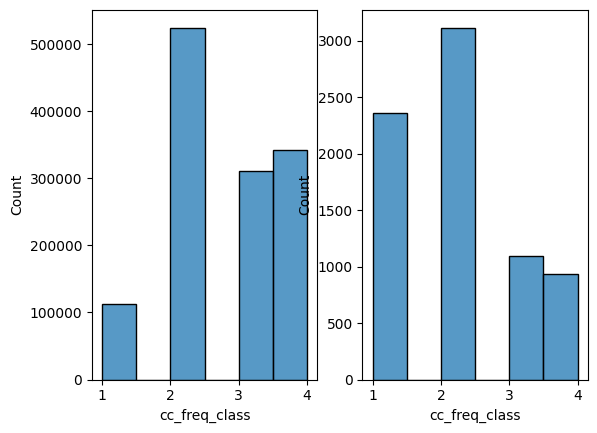

In [67]:
def class_det(x):
    for idx,val in enumerate(list(range(800,5000,800))):
        if x < val:
            return idx+1
train_data['cc_freq_class'] = train_data['cc_freq'].apply(class_det)

test_data['cc_freq_class'] = test_data['cc_freq'].apply(class_det)

print(train_data['cc_freq_class'].unique())
hist_show('cc_freq_class')

In [68]:
fraud_percentage_by_class = train_data.groupby('cc_freq_class')['is_fraud'].mean() * 100

print(fraud_percentage_by_class)

cc_freq_class
1    2.060334
2    0.590935
3    0.352461
4    0.271482
Name: is_fraud, dtype: float64


Now clearly frauds occurs more in credit cards with less use (new ones) and for genuine transactions, it follows a normal distribution.

In [69]:
len(train_data.columns)

38

In [70]:
len(test_data.columns)

38

# Drop unnecessary columns


In [71]:
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'trans_date', 'merchant', 'trans_datetime']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)


# Data Preprocceing

### Drop duplicates


In [72]:
train_data.drop_duplicates(inplace=True)

### checking null values

In [73]:
train_data.isnull().sum()


cc_num                   0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hour                     0
week_day                 0
transactions_last_1d     0
transactions_last_7d     0
transactions_last_30d    0
DayOfWeek                0
DayOfWeekSin             0
DayOfWeekCos             0
age                      0
day                      0
month                    0
cc_freq                  0
cc_freq_class            0
dtype: int64

In [74]:
test_data.isnull().sum()


cc_num                   0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hour                     0
week_day                 0
transactions_last_1d     0
transactions_last_7d     0
transactions_last_30d    0
DayOfWeek                0
DayOfWeekSin             0
DayOfWeekCos             0
age                      0
day                      0
month                    0
cc_freq                  0
cc_freq_class            0
dtype: int64

### Encoding categorical variables

In [75]:
categorical_columns = train_data.select_dtypes(include=['object']).columns

print("Categorical Columns:")
categorical_columns

Categorical Columns:


Index(['category', 'gender', 'day'], dtype='object')

In [76]:
train_data = pd.get_dummies(train_data, columns=['category', 'gender', 'day'], drop_first=True)

In [77]:
test_data = pd.get_dummies(test_data, columns=['category', 'gender', 'day'], drop_first=True)

### Scaling

In [78]:
X = train_data.drop('is_fraud', axis=1)
y = train_data['is_fraud']

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA

In [80]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

In [81]:
columns_pca = [f'pca_{i+1}' for i in range(20)]
df_pca = pd.DataFrame(X_pca, columns=columns_pca)
df_pca['is_fraud'] = y

print(df_pca.head())

      pca_1     pca_2     pca_3     pca_4     pca_5      pca_6       pca_7  \
0  4.109579  2.185115  0.267910  0.515260  0.644190  15.998422  473.649165   
1  4.114791  2.253842  0.339259  5.802695  0.500940  16.804703  473.603788   
2  4.170559  5.851082  0.140322  3.243303  2.379979  14.418536  473.664047   
3  4.162613  6.415045  0.095170  3.981266  1.692732  15.506079  473.616052   
4  4.108357  2.782814  0.250066  0.563348 -0.057926  15.482476  473.674070   

       pca_8      pca_9     pca_10  ...    pca_12    pca_13    pca_14  \
0  58.983190  22.768167   8.907402  ...  5.260097  0.932933  0.277410   
1  58.996993  22.407622  10.217137  ...  5.237669  1.129693  1.307650   
2  58.956668  22.510625   9.455996  ...  5.256130  0.412443  0.106650   
3  58.958814  22.849907   7.977067  ...  5.194974  0.842362  0.471599   
4  58.958743  22.649050   8.894176  ...  5.228158 -1.090557 -0.526563   

     pca_15    pca_16    pca_17    pca_18    pca_19    pca_20  is_fraud  
0 -0.106408 -0.573

In [82]:
def remove_outliers_iqr(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

In [83]:
train_data = remove_outliers_iqr(df_pca, features=df_pca.columns)

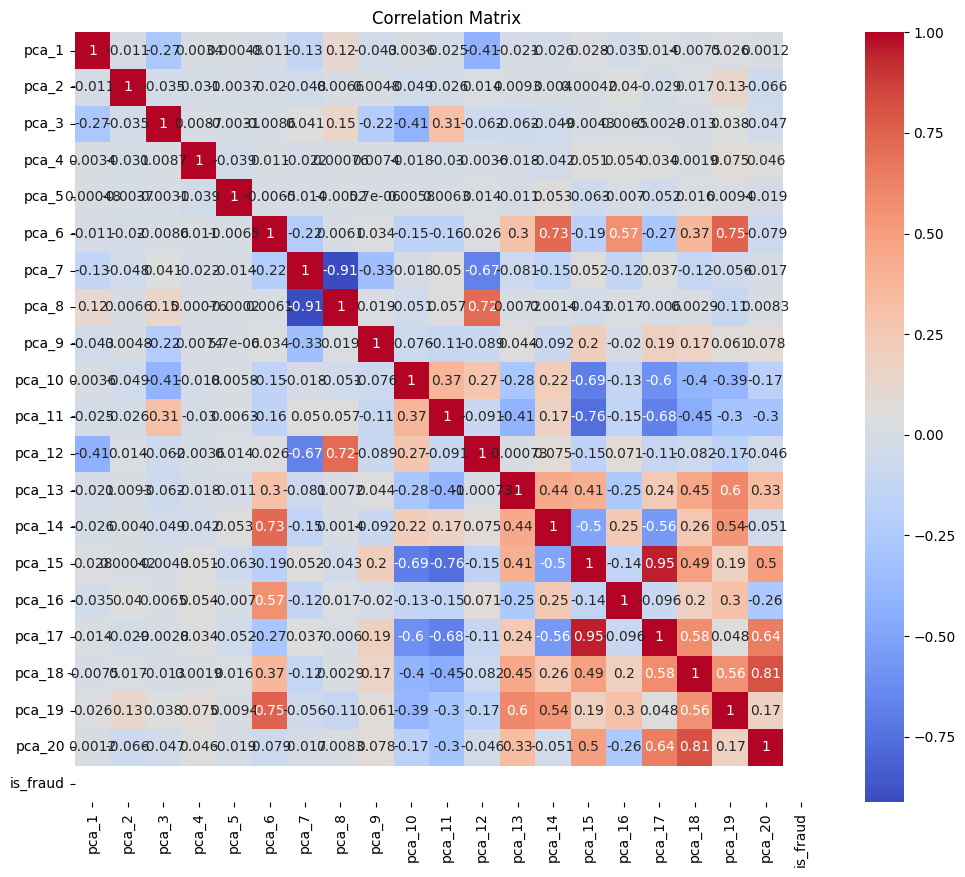

In [84]:
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [85]:
X = df_pca.drop('is_fraud', axis=1)
y = df_pca['is_fraud']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE for oversampling

In [87]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [88]:
print('Current length of the training set: ', len(y_resampled))

Current length of the training set:  2062708


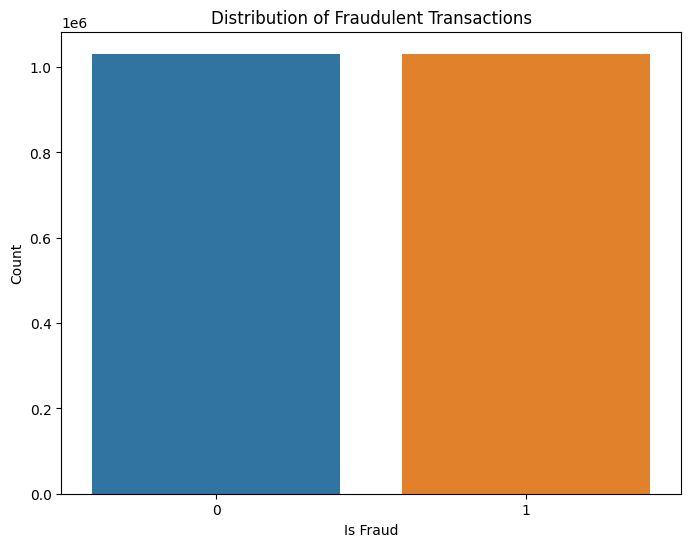

In [89]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [90]:
x_train_copy = X_resampled 
y_train_copy = y_resampled

x_train = X_resampled [:100000]
y_train = y_resampled[:100000]

# Models

## Logistic Regression model

In [91]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

lg_predictions = lg_model.predict(X_test)

lg_accuracy = accuracy_score(y_test, lg_predictions)

print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))

Logistic Regression Accuracy: 99.377%


### ROC curve and AUC

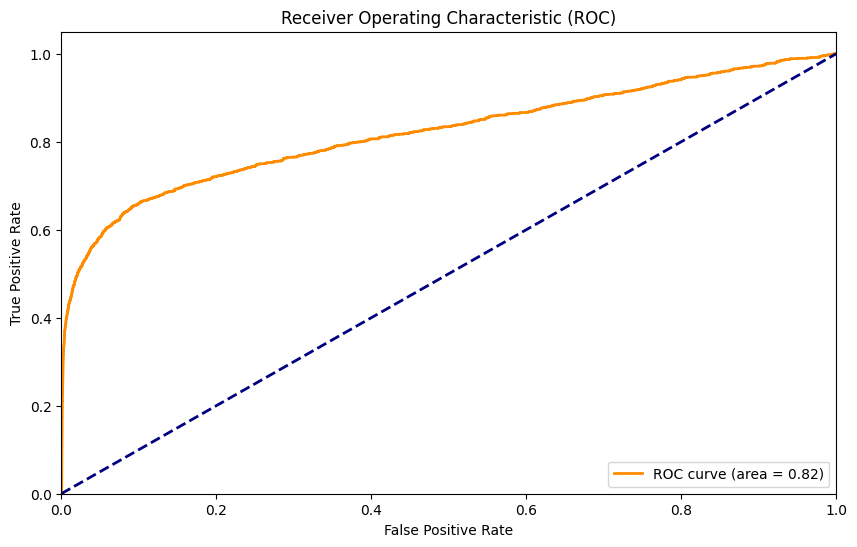

In [92]:
probs = lg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### confusion matrix for Logistic Regression model

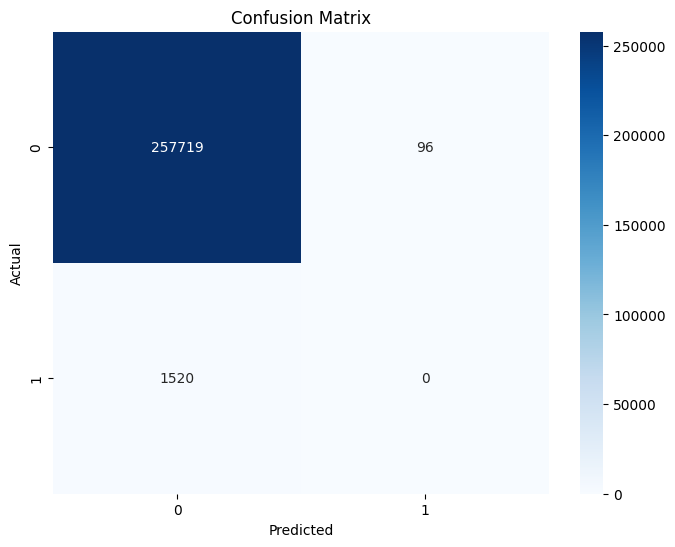

In [93]:
conf_matrix = confusion_matrix(y_test, lg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM model

In [94]:
svm_model = SVC(kernel='poly')
svm_model.fit(x_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)

print("SVM Accuracy: {:.3f}%".format(svm_accuracy * 100))

SVM Accuracy: 99.528%


### ROC curve and AUC

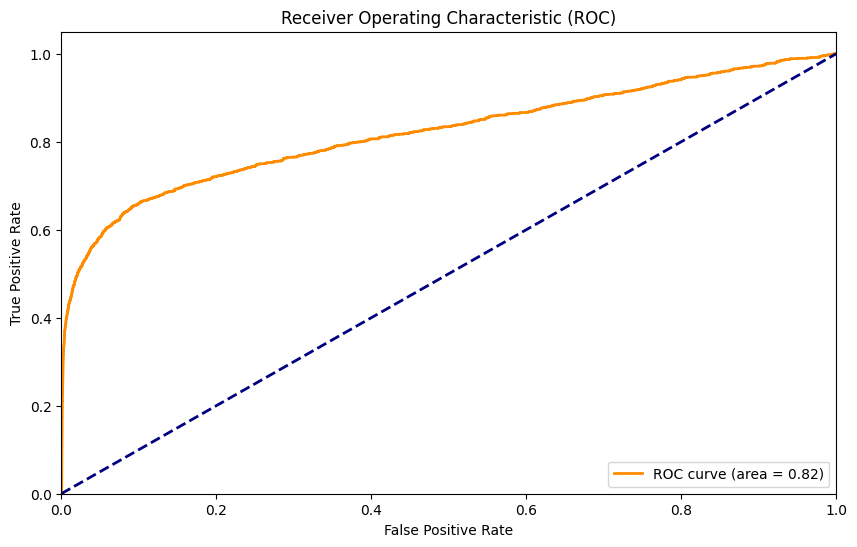

In [95]:
decision_scores_svm = svm_model.decision_function(X_test)

fpr_svm, tpr_svm, _ = roc_curve(y_test, decision_scores_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### confusion matrix for SVM model

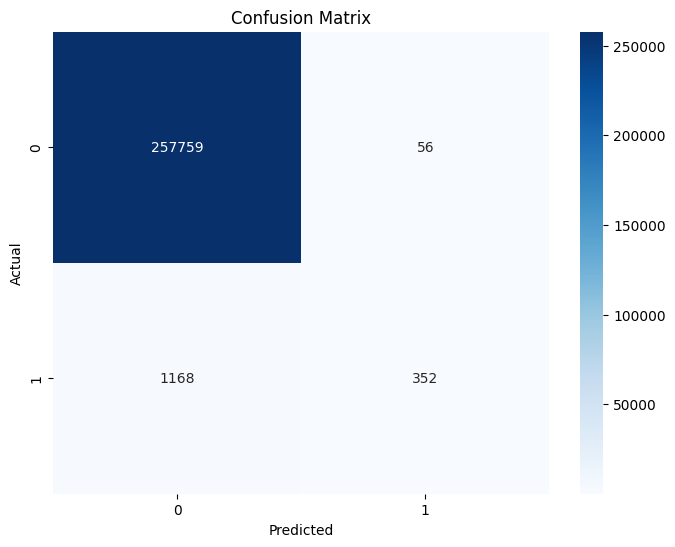

In [96]:
conf_matrix = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN model

In [97]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)

print("KNN Accuracy: {:.3f}%".format(knn_accuracy * 100))

KNN Accuracy: 99.486%


### ROC curve and AUC

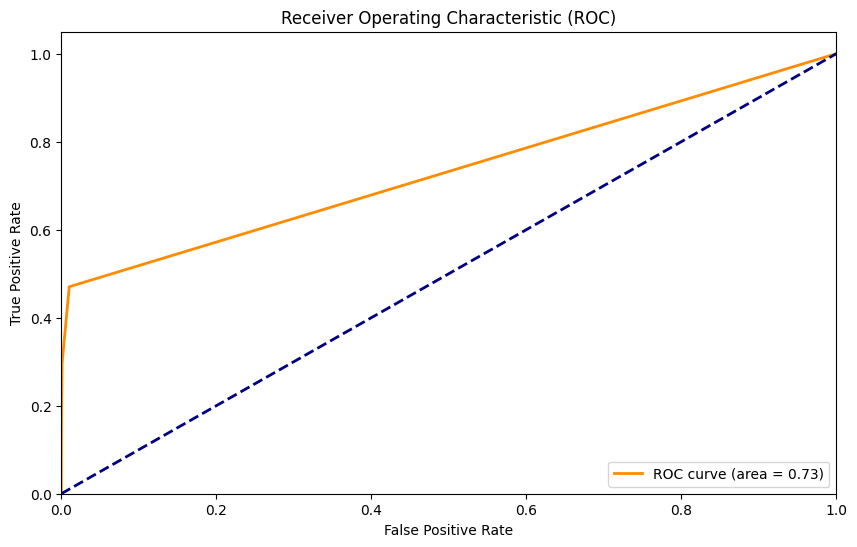

In [98]:
probs = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### confusion matrix for KNN model

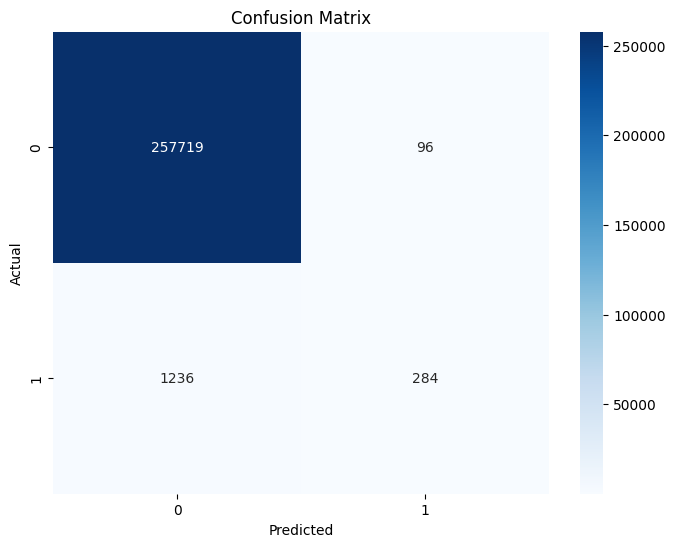

In [99]:
conf_matrix = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest model

In [100]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))

Random Forest Accuracy: 99.628%


### ROC curve and AUC

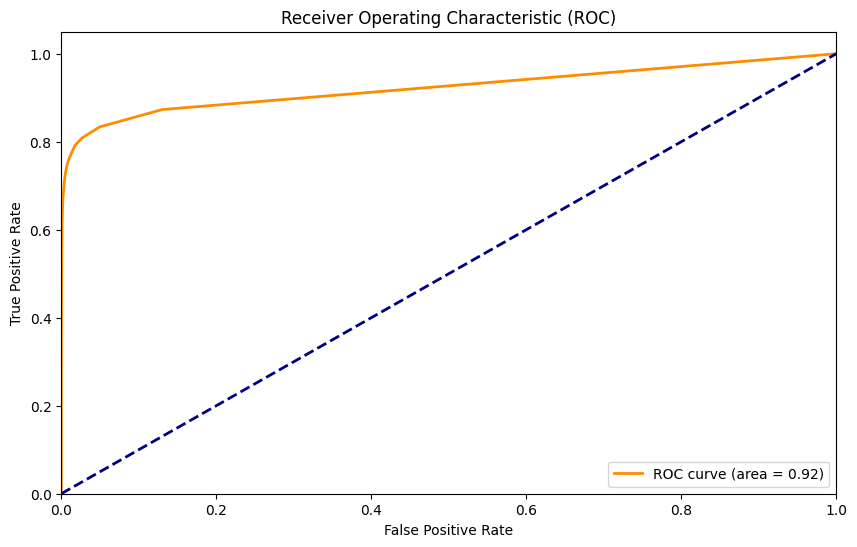

In [101]:
probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### confusion matrix for RF model

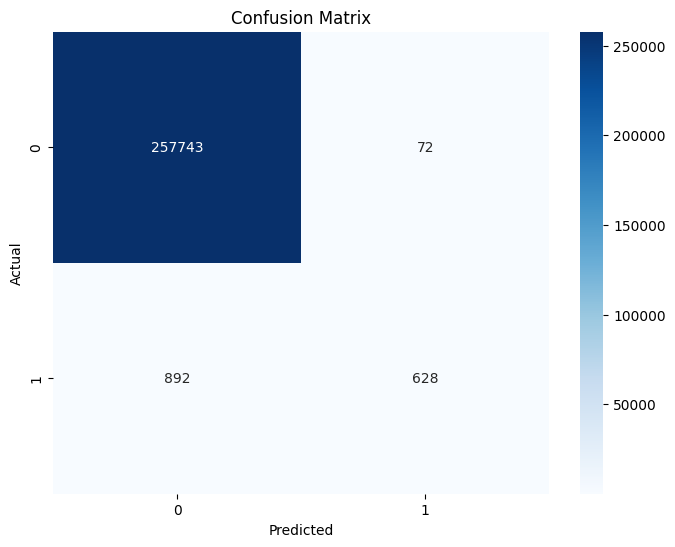

In [102]:
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SGD model

In [103]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(x_train, y_train)

sgd_predictions = sgd_model.predict(X_test)

sgd_accuracy = accuracy_score(y_test, sgd_predictions)

print("SGD Accuracy: {:.3f}%".format(sgd_accuracy * 100))

SGD Accuracy: 99.396%


### ROC curve and AUC

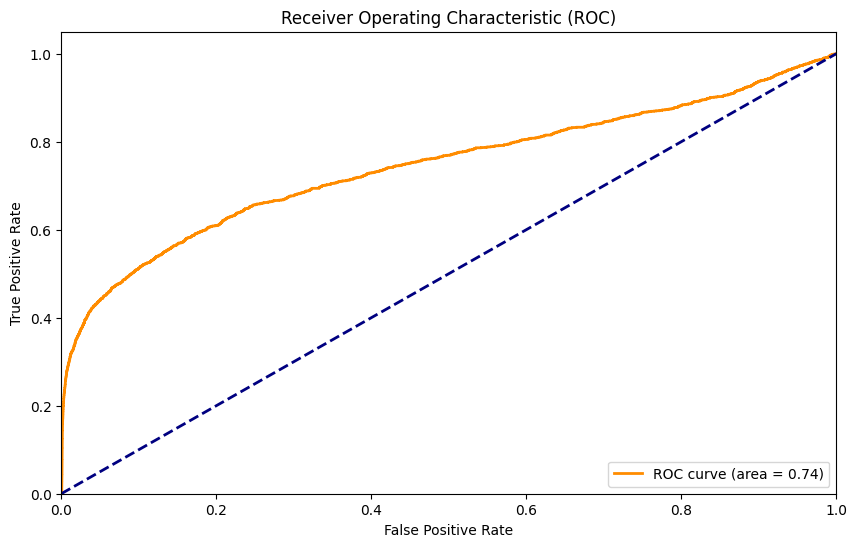

In [104]:
decision_scores = sgd_model.decision_function(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### confusion matrix for SGD model

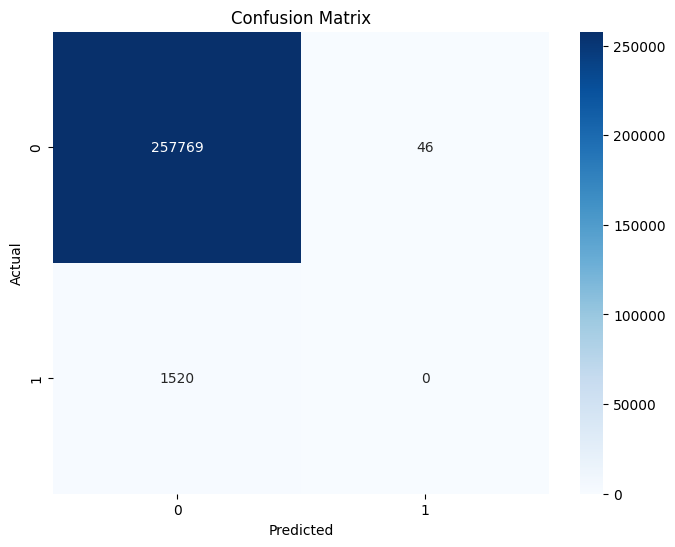

In [105]:
conf_matrix = confusion_matrix(y_test, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Extra Trees model


In [106]:
extra_trees_model = ExtraTreesClassifier(random_state=42)
extra_trees_model.fit(x_train, y_train)

ext_predictions = extra_trees_model.predict(X_test)

ext_accuracy = accuracy_score(y_test, ext_predictions)

print("Extra Tree Accuracy: {:.3f}%".format(ext_accuracy * 100))

Extra Tree Accuracy: 99.593%


### ROC curve and AUC

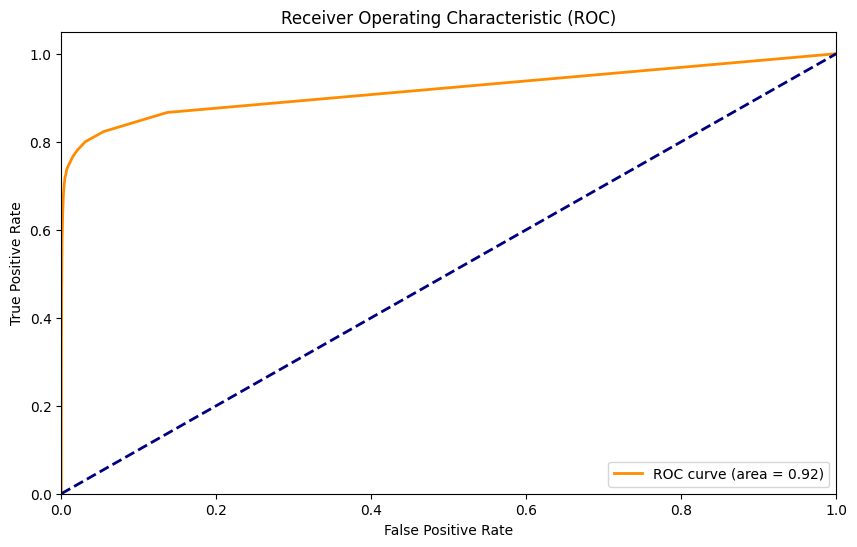

In [107]:
probs = extra_trees_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### confusion matrix for Extra Trees model

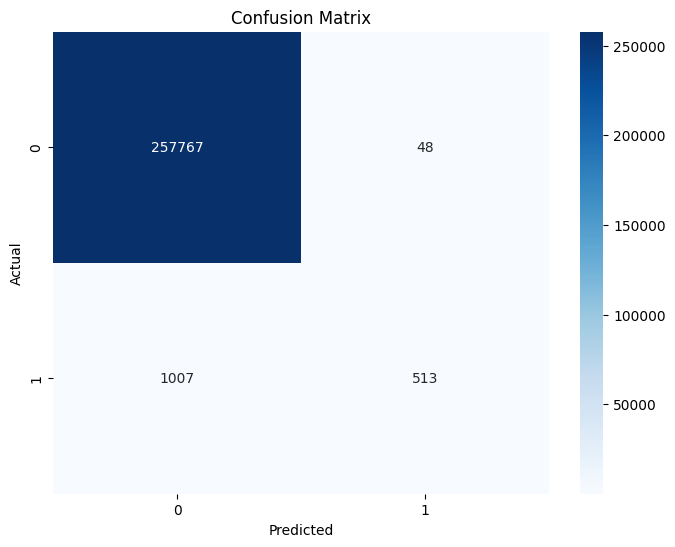

In [108]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, ext_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Gaussian Naive Bayes model

In [109]:
bayes_model = GaussianNB()
bayes_model.fit(x_train, y_train)

bayes_predictions = bayes_model.predict(X_test)

bayes_accuracy = accuracy_score(y_test, bayes_predictions)

print("Extra Tree Accuracy: {:.3f}%".format(bayes_accuracy * 100))

Extra Tree Accuracy: 98.382%


### ROC curve and AUC

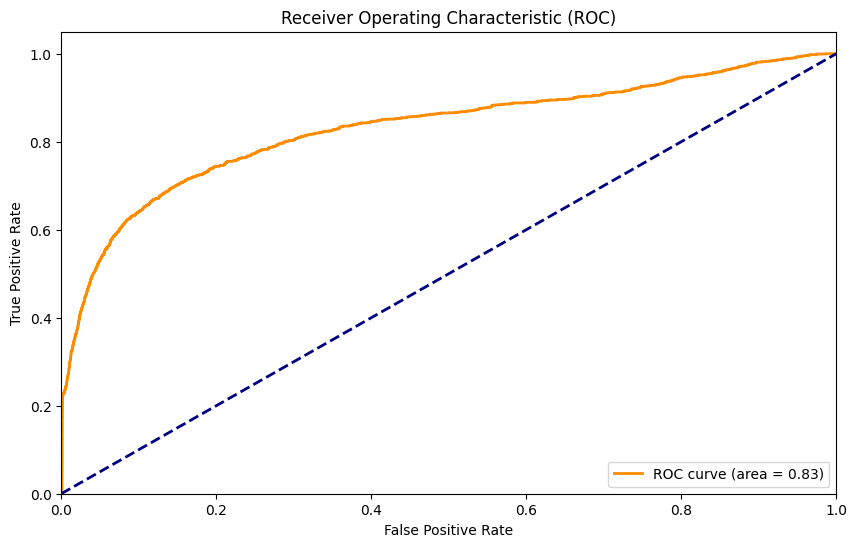

In [110]:
probs = bayes_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### confusion matrix for Gaussian Naive Bayes model

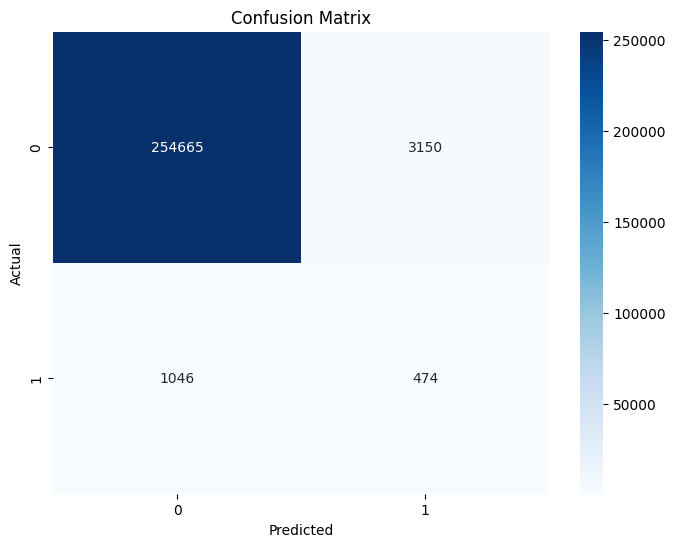

In [111]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, bayes_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model selection

In [112]:
models = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'SGD', 'Extra Trees', 'Naive Bayes']
model_instances = [lg_model, svm_model, knn_model, rf_model, sgd_model, extra_trees_model, bayes_model]

In [113]:
accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

In [114]:
for model in model_instances:
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_score = roc_auc_score(y_test, predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(str(f1_score(y_test, predictions)))
    precision_scores.append(str(precision_score(y_test, predictions)))
    recall_scores.append(str(recall_score(y_test, predictions)))

In [115]:
results_df = {
    'Model': models,
    'Accuracy': accuracy_scores,
    'ROC Score': roc_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
}

In [116]:
for i in range(0,7):
    for key in results_df.keys():
        print(f"{key}: {results_df[key][i]}")
    print('==============================================')

Model: Logistic Regression
Accuracy: 0.993768677579193
ROC Score: 0.49981381998720015
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Model: SVM
Accuracy: 0.9952802359882006
ROC Score: 0.615680868676744
F1 Score: 0.3651452282157676
Precision Score: 0.8627450980392157
Recall Score: 0.23157894736842105
Model: KNN
Accuracy: 0.9948637862224535
ROC Score: 0.593234872618779
F1 Score: 0.2989473684210526
Precision Score: 0.7473684210526316
Recall Score: 0.1868421052631579
Model: Random Forest
Accuracy: 0.996282800239073
ROC Score: 0.7064393123588212
F1 Score: 0.5657657657657658
Precision Score: 0.8971428571428571
Recall Score: 0.4131578947368421
Model: SGD
Accuracy: 0.9939614783966684
ROC Score: 0.49991078874386674
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Model: Extra Trees
Accuracy: 0.9959319027512676
ROC Score: 0.6686569099936001
F1 Score: 0.49303219605958676
Precision Score: 0.9144385026737968
Recall Score: 0.3375
Model: Naive Bayes
Accuracy: 0.9838201553974589
ROC Score: 0

In [117]:
classes = np.unique(y_train)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))
class_weights

{0: 0.5029169181251257, 1: 86.20689655172414}

In [118]:
logistic_model = LogisticRegression(class_weight=class_weights)
logistic_model.fit(x_train, y_train)

LogisticRegression(class_weight={0: 0.5029169181251257, 1: 86.20689655172414})

In [119]:
knn_model = KNeighborsClassifier(weights='distance')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [120]:
svm_model = SVC(class_weight=class_weights, probability=True)
svm_model.fit(x_train, y_train)

SVC(class_weight={0: 0.5029169181251257, 1: 86.20689655172414},
    probability=True)

In [121]:
tree_model = DecisionTreeClassifier(class_weight=class_weights)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5029169181251257,
                                     1: 86.20689655172414})

In [122]:
rf_model = RandomForestClassifier(class_weight=class_weights)
rf_model.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.5029169181251257,
                                     1: 86.20689655172414})

In [123]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [131]:
# Function to print metrics
def print_metrics(model, X, y_true):
    # Predictions
    y_pred = model.predict(X)
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Classification Report
    report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(report)

    # ROC Curve
    y_scores = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)


    plt.tight_layout()
    plt.show()

In [132]:
print("Logistic Regression Metrics:")
print_metrics(logistic_model, X_test, y_test)

Logistic Regression Metrics:
Accuracy: 0.8430
Confusion Matrix:
[[217483  40332]
 [   391   1129]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    257815
           1       0.03      0.74      0.05      1520

    accuracy                           0.84    259335
   macro avg       0.51      0.79      0.48    259335
weighted avg       0.99      0.84      0.91    259335



<Figure size 1200x400 with 0 Axes>

In [133]:
print("SVM Metrics:")
print_metrics(svm_model, X_test, y_test)

SVM Metrics:
Accuracy: 0.9641
Confusion Matrix:
[[248856   8959]
 [   352   1168]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    257815
           1       0.12      0.77      0.20      1520

    accuracy                           0.96    259335
   macro avg       0.56      0.87      0.59    259335
weighted avg       0.99      0.96      0.98    259335



<Figure size 1200x400 with 0 Axes>

In [134]:
print("KNN Metrics:")
print_metrics(knn_model, X_test, y_test)

KNN Metrics:
Accuracy: 0.9950
Confusion Matrix:
[[257710    105]
 [  1194    326]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.76      0.21      0.33      1520

    accuracy                           0.99    259335
   macro avg       0.88      0.61      0.67    259335
weighted avg       0.99      0.99      0.99    259335



<Figure size 1200x400 with 0 Axes>

In [135]:
print("Decision Tree Metrics:")
print_metrics(tree_model, X_test, y_test)

Decision Tree Metrics:
Accuracy: 0.9947
Confusion Matrix:
[[257237    578]
 [   803    717]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.55      0.47      0.51      1520

    accuracy                           0.99    259335
   macro avg       0.78      0.73      0.75    259335
weighted avg       0.99      0.99      0.99    259335



<Figure size 1200x400 with 0 Axes>

In [136]:
print("Random Forest Metrics:")
print_metrics(rf_model, X_test, y_test)

Random Forest Metrics:
Accuracy: 0.9960
Confusion Matrix:
[[257759     56]
 [   984    536]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.91      0.35      0.51      1520

    accuracy                           1.00    259335
   macro avg       0.95      0.68      0.75    259335
weighted avg       1.00      1.00      1.00    259335



<Figure size 1200x400 with 0 Axes>

In [137]:
print("Naive Bayes Metrics:")
print_metrics(nb_model, X_test, y_test)

Naive Bayes Metrics:
Accuracy: 0.9838
Confusion Matrix:
[[254665   3150]
 [  1046    474]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257815
           1       0.13      0.31      0.18      1520

    accuracy                           0.98    259335
   macro avg       0.56      0.65      0.59    259335
weighted avg       0.99      0.98      0.99    259335



<Figure size 1200x400 with 0 Axes>